# Базовые возможности Pandas

In [1]:
import pandas as pd

## Переиндексация

In [2]:
dict_footbal = {'name':['messi','ronaldo','neymar','ibra','mbappe'], 'speed':[7,8,9,6,10],'shoot':[9,8,7,7,8],'dribbling':[10,7,9,7,8],'pas':[9,6,8,7,7],'phy':[7,9,6,8,7]}

In [3]:
data_footbal = pd.DataFrame(dict_footbal)
data_footbal.index = [10,7,11,21,29]
data_footbal

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
7,ronaldo,8,8,7,6,9
11,neymar,9,7,9,8,6
21,ibra,6,7,7,7,8
29,mbappe,10,8,8,7,7


In [5]:
data_footbal = data_footbal.reindex([10,21,11,29,7], axis=0)  # смена последовательности индексов (упорядочить)
data_footbal 

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
21,ibra,6,7,7,7,8
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7
7,ronaldo,8,8,7,6,9


In [7]:
data_footbal.reindex(['name','shoot','pas','dribbling','speed','phy'],axis=1)  # смена индексов по оси (колонки)

,name,shoot,pas,dribbling,speed,phy
10,messi,9,9,10,7,7
21,ibra,7,7,7,6,8
11,neymar,7,8,9,9,6
29,mbappe,8,7,8,10,7
7,ronaldo,8,6,7,8,9


In [9]:
series1 = pd.Series(['vanya','alex','slavik'])
series1 = series1.reindex([1,2,0])  # упорядочивание индексов
series1

1      alex
2    slavik
0     vanya
dtype: object

In [10]:
series2 = pd.Series([132,76,98],index=['index1','index2','index3'])
series2

index1    132
index2     76
index3     98
dtype: int64

In [13]:
# параметр method заполняет отсутствующие значения, опираясь на известные 
# ИНТЕРПОЛЯЦИЯ
series2.reindex(['index1','index2','index3','new_index4', 'new_index5'], method='ffill') 

index1        132
index2         76
index3         98
new_index4     98
new_index5     98
dtype: int64

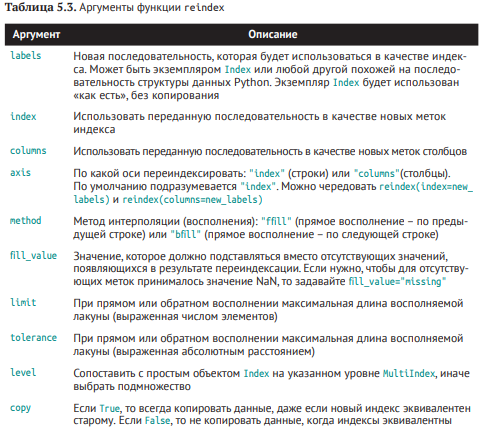

## Удаление элементов из оси

In [14]:
series1

1      alex
2    slavik
0     vanya
dtype: object

In [15]:
series_name = series1
series_name.drop(2)  # удаление по индексу (метке)

1     alex
0    vanya
dtype: object

In [16]:
series_name.drop([0,1])

2    slavik
dtype: object

In [17]:
data_footbal

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
21,ibra,6,7,7,7,8
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7
7,ronaldo,8,8,7,6,9


In [20]:
data_footbal.drop(10, axis=0)  # удаляем по индексу СТРОЧКУ (axis=0)

,name,speed,shoot,dribbling,pas,phy
21,ibra,6,7,7,7,8
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7
7,ronaldo,8,8,7,6,9


In [23]:
data_footbal.drop(['phy','speed'], axis=1)  # удаляем по индексу СТОЛБЕЦ (axis=1)

,name,shoot,dribbling,pas
10,messi,9,10,9
21,ibra,7,7,7
11,neymar,7,9,8
29,mbappe,8,8,7
7,ronaldo,8,7,6


In [24]:
# аналогично с помощью аргумента columns и index
data_footbal.drop(columns=['speed','dribbling'], index=[10,7])


,name,shoot,pas,phy
21,ibra,7,7,8
11,neymar,7,8,6
29,mbappe,8,7,7


## Доступ по индексу, выборка и фильтрация

In [31]:
series_iq = pd.Series([72,89,132], index=series_name, name='iq_series',dtype='int32')
series_iq

alex       72
slavik     89
vanya     132
Name: iq_series, dtype: int32

In [33]:
series_iq['kpss'] = 145
series_iq['oxxxy'] = 138
series_iq

alex       72
slavik     89
vanya     132
kpss      145
oxxxy     138
Name: iq_series, dtype: int64

In [34]:
series_iq[3]  # взять значение по индексу

145

In [35]:
series_iq[['kpss','oxxxy']]  # взять значение по метке

kpss     145
oxxxy    138
Name: iq_series, dtype: int64

In [36]:
series_iq.loc['oxxxy']  # взять значение по метке с помощью .loc[]

138

In [37]:
series_iq.iloc[3]  # взять значение по индексу с помощью .iloc[]

145

In [38]:
series_iq.loc['alex':'kpss']  # срезы (границы включены)

alex       72
slavik     89
vanya     132
kpss      145
Name: iq_series, dtype: int64

In [39]:
data_footbal

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
21,ibra,6,7,7,7,8
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7
7,ronaldo,8,8,7,6,9


In [40]:
data_footbal['name']  # стобец из датафрейма по его индексу (серия)

10      messi
21       ibra
11     neymar
29     mbappe
7     ronaldo
Name: name, dtype: object

In [41]:
data_footbal[['name','shoot']]  # выборка датафрейма по столбцам

,name,shoot
10,messi,9
21,ibra,7
11,neymar,7
29,mbappe,8
7,ronaldo,8


In [44]:
# !!!!!!!!!!!!!!!!!!!!!
data_footbal[:3]   # срезы по строкам

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
21,ibra,6,7,7,7,8
11,neymar,9,7,9,8,6


In [46]:
data_skills = data_footbal.drop('name', axis=1)
data_skills

,speed,shoot,dribbling,pas,phy
10,7,9,10,9,7
21,6,7,7,7,8
11,9,7,9,8,6
29,10,8,8,7,7
7,8,8,7,6,9


In [47]:
data_skills is data_footbal.drop('name',axis=1) # создаётся копия?

False

In [48]:
mask1 = data_skills['speed']>=8 
mask2 = data_skills['phy']>=8

data_footbal[(mask1&mask2)]

,name,speed,shoot,dribbling,pas,phy
7,ronaldo,8,8,7,6,9


In [49]:
data_footbal[mask1]

,name,speed,shoot,dribbling,pas,phy
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7
7,ronaldo,8,8,7,6,9


In [52]:
data_skills >= 8 


,speed,shoot,dribbling,pas,phy
10,False,True,True,True,False
21,False,False,False,False,True
11,True,False,True,True,False
29,True,True,True,False,False
7,True,True,False,False,True


In [55]:
data_footbal[(data_skills['speed']<=7) & (data_skills['dribbling']>=8)]  # комплексные условия обозночаются в скобка [()&()]

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7


In [56]:
data_footbal.loc[[10,21]]

,name,speed,shoot,dribbling,pas,phy
10,messi,7,9,10,9,7
21,ibra,6,7,7,7,8


In [57]:
data_footbal.loc[10,'speed']  # через запятую СТРОКИ/СТОЛБЦЫ

7

In [58]:
data_footbal.loc[[10,7],['name','pas','shoot']]  # не забывать про вложенные списки для обозначения 

,name,pas,shoot
10,messi,9,9
7,ronaldo,6,8


In [59]:
data_footbal.iloc[0]  # то же самое, но по ИНДЕКСУ

name         messi
speed            7
shoot            9
dribbling       10
pas              9
phy              7
Name: 10, dtype: object

In [60]:
data_footbal.iloc[[2,4],[0,1]]  # аналогично

,name,speed
11,neymar,9
7,ronaldo,8


In [61]:
data_footbal.name  # столбец 'name' - Series

10      messi
21       ibra
11     neymar
29     mbappe
7     ronaldo
Name: name, dtype: object

In [62]:
data_footbal.loc[:][data_footbal.speed>=9]  # и фильрация (то же самое, что и data_footbal['speed']>=9)

,name,speed,shoot,dribbling,pas,phy
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7


In [63]:
data_footbal.loc[:][data_footbal['speed']>=9]

,name,speed,shoot,dribbling,pas,phy
11,neymar,9,7,9,8,6
29,mbappe,10,8,8,7,7


In [64]:
data_footbal[['name','pas']]

,name,pas
10,messi,9
21,ibra,7
11,neymar,8
29,mbappe,7
7,ronaldo,6


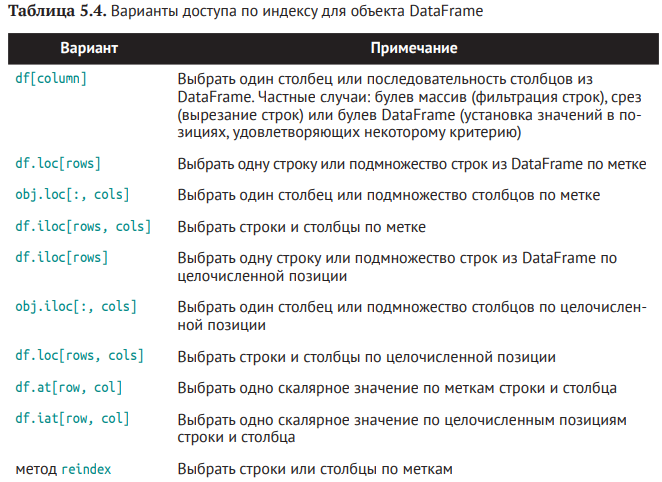

## Арифметические операции и выравнивание данных

In [65]:
series_iq

alex       72
slavik     89
vanya     132
kpss      145
oxxxy     138
Name: iq_series, dtype: int64

In [66]:
series_high = pd.Series([184,162,185,194,178],index=['vanya','alex','slavik','kpss','oxxxy'])
series_high

vanya     184
alex      162
slavik    185
kpss      194
oxxxy     178
dtype: int64

In [67]:
series_high + series_iq  # сумма серий 

alex      234
kpss      339
oxxxy     316
slavik    274
vanya     316
dtype: int64

In [68]:
# !!! если каких то индексов нет
series_iq['einstein'] = 165
series_high + series_iq  # значение NaN для отсутствующих

alex        234.0
einstein      NaN
kpss        339.0
oxxxy       316.0
slavik      274.0
vanya       316.0
dtype: float64

In [69]:
series_iq.drop('einstein')

alex       72
slavik     89
vanya     132
kpss      145
oxxxy     138
Name: iq_series, dtype: int64

In [70]:
data_friends = pd.DataFrame([series_high,series_iq],index=['iq','high'])
data_friends = data_friends.T
data_friends.index.name = 'name'
data_friends.columns.name = 'info'
data_friends

info,iq,high
name,,
vanya,184.0,132.0
alex,162.0,72.0
slavik,185.0,89.0
kpss,194.0,145.0
oxxxy,178.0,138.0
einstein,NaN,165.0


In [71]:
data_friends['speed'] = [8,6,7,7,5,3]
data_friends

info,iq,high,speed
name,,,
vanya,184.0,132.0,8
alex,162.0,72.0,6
slavik,185.0,89.0,7
kpss,194.0,145.0,7
oxxxy,178.0,138.0,5
einstein,NaN,165.0,3


In [72]:
data_footbal.merge(data_friends)

,name,speed,shoot,dribbling,pas,phy,iq,high
0,messi,7,9,10,9,7,185.0,89.0
1,messi,7,9,10,9,7,194.0,145.0
2,ibra,6,7,7,7,8,162.0,72.0
3,ronaldo,8,8,7,6,9,184.0,132.0


In [73]:
data_footbal = data_footbal.set_index('name')

In [76]:
# чтобы добавить к фрейму новый, заменяя отсуствующие значения, испольузуем add (сложение)
big_data_footbal = data_footbal.add(data_friends, fill_value=0)
big_data_footbal

,dribbling,high,iq,pas,phy,shoot,speed
name,,,,,,,
alex,NaN,72.0,162.0,NaN,NaN,NaN,6.0
einstein,NaN,165.0,NaN,NaN,NaN,NaN,3.0
ibra,7.0,NaN,NaN,7.0,8.0,7.0,6.0
kpss,NaN,145.0,194.0,NaN,NaN,NaN,7.0
mbappe,8.0,NaN,NaN,7.0,7.0,8.0,10.0
messi,10.0,NaN,NaN,9.0,7.0,9.0,7.0
neymar,9.0,NaN,NaN,8.0,6.0,7.0,9.0
oxxxy,NaN,138.0,178.0,NaN,NaN,NaN,5.0
ronaldo,7.0,NaN,NaN,6.0,9.0,8.0,8.0


In [77]:
data_footbal / 10 # операции с датафреймами

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,0.7,0.9,1.0,0.9,0.7
ibra,0.6,0.7,0.7,0.7,0.8
neymar,0.9,0.7,0.9,0.8,0.6
mbappe,1.0,0.8,0.8,0.7,0.7
ronaldo,0.8,0.8,0.7,0.6,0.9


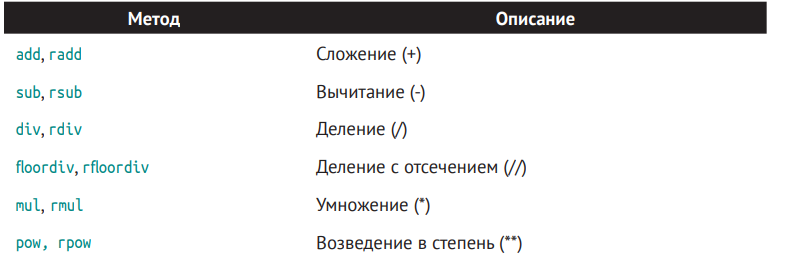

In [78]:
data_friends

info,iq,high,speed
name,,,
vanya,184.0,132.0,8
alex,162.0,72.0,6
slavik,185.0,89.0,7
kpss,194.0,145.0,7
oxxxy,178.0,138.0,5
einstein,NaN,165.0,3


In [79]:
s1 = data_friends.loc['alex']
s1

info
iq       162.0
high      72.0
speed      6.0
Name: alex, dtype: float64

In [80]:
data_friends - s1  # арифметические операции между Series и DataFraim

info,iq,high,speed
name,,,
vanya,22.0,60.0,2.0
alex,0.0,0.0,0.0
slavik,23.0,17.0,1.0
kpss,32.0,73.0,1.0
oxxxy,16.0,66.0,-1.0
einstein,NaN,93.0,-3.0


## Применение функций и отображение

In [81]:
import numpy as np

In [82]:
np.square(data_footbal)

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,49,81,100,81,49
ibra,36,49,49,49,64
neymar,81,49,81,64,36
mbappe,100,64,64,49,49
ronaldo,64,64,49,36,81


- .apply(function)

In [83]:
def func1(col):
    return min(col)

In [84]:
data_footbal

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,7,9,10,9,7
ibra,6,7,7,7,8
neymar,9,7,9,8,6
mbappe,10,8,8,7,7
ronaldo,8,8,7,6,9


In [87]:
data_footbal.apply(func1,axis=1)  # применение функции ЦЕЛОЙ СТРОКЕ или СТОЛБЦУ

name
messi      7
ibra       6
neymar     6
mbappe     7
ronaldo    6
dtype: int64

In [88]:
data_footbal.apply(func1,axis=0)

speed        6
shoot        7
dribbling    7
pas          6
phy          6
dtype: int64

In [89]:
# функция apply может возвращать не только числа, но и другие объекты
def func2(x):
    return pd.Series([min(x),(max(x))], index=['minimum','maximum'])
data_footbal.apply(func2)

,speed,shoot,dribbling,pas,phy
minimum,6,7,7,6,6
maximum,10,9,10,9,9


In [90]:
# функция applymap применяет некоторую функцию к фрейму ПОЭЛЕМЕНТНО
def func3(x):
    return f'{x*10}%'
data_footbal.applymap(func3)

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,70%,90%,100%,90%,70%
ibra,60%,70%,70%,70%,80%
neymar,90%,70%,90%,80%,60%
mbappe,100%,80%,80%,70%,70%
ronaldo,80%,80%,70%,60%,90%


In [91]:
# map применяется к Series поэлементно
series_name.map(lambda x: x.upper())

1      ALEX
2    SLAVIK
0     VANYA
dtype: object

## Сортировка и ранжирование

In [92]:
data_footbal

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,7,9,10,9,7
ibra,6,7,7,7,8
neymar,9,7,9,8,6
mbappe,10,8,8,7,7
ronaldo,8,8,7,6,9


In [95]:
data_footbal.sort_index(axis=0)  # сортировка по индексам СТРОК (axis=1 - по столбцам)

,speed,shoot,dribbling,pas,phy
name,,,,,
ibra,6,7,7,7,8
mbappe,10,8,8,7,7
messi,7,9,10,9,7
neymar,9,7,9,8,6
ronaldo,8,8,7,6,9


In [96]:
data_footbal.sort_values('pas',ascending=True)  # сортировка по ЗНАЧЕНИЯМ, параметр ascending - убыв/возраст

,speed,shoot,dribbling,pas,phy
name,,,,,
ronaldo,8,8,7,6,9
ibra,6,7,7,7,8
mbappe,10,8,8,7,7
neymar,9,7,9,8,6
messi,7,9,10,9,7


In [97]:
data_footbal.sort_values(['shoot','phy'])  # сортировка по нескольким столбцам (в указанном порядке)

,speed,shoot,dribbling,pas,phy
name,,,,,
neymar,9,7,9,8,6
ibra,6,7,7,7,8
mbappe,10,8,8,7,7
ronaldo,8,8,7,6,9
messi,7,9,10,9,7


In [98]:
series_iq

alex         72
slavik       89
vanya       132
kpss        145
oxxxy       138
einstein    165
Name: iq_series, dtype: int64

In [99]:
series_iq.sort_index()  # сортировка Series по индексам

alex         72
einstein    165
kpss        145
oxxxy       138
slavik       89
vanya       132
Name: iq_series, dtype: int64

In [100]:
series_iq.sort_values() # сортировка Series по значениям

alex         72
slavik       89
vanya       132
oxxxy       138
kpss        145
einstein    165
Name: iq_series, dtype: int64

- ранжирование

In [101]:
series_iq.rank(ascending=False) # ранги (у большего 1 у самого мелкого 6 )

alex        6.0
slavik      5.0
vanya       4.0
kpss        2.0
oxxxy       3.0
einstein    1.0
Name: iq_series, dtype: float64

In [102]:
data_footbal.rank(ascending=False)  # дробные ранги, потому что одинаковые значения

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,4.0,1.0,1.0,1.0,3.5
ibra,5.0,4.5,4.5,3.5,2.0
neymar,2.0,4.5,2.0,2.0,5.0
mbappe,1.0,2.5,3.0,3.5,3.5
ronaldo,3.0,2.5,4.5,5.0,1.0


 чтобы обработать ранги одинаковых значений, использовать параметр method = ...
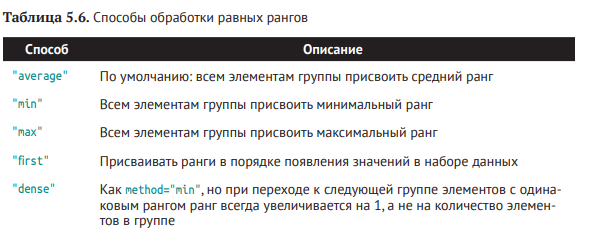

In [103]:
data_footbal.rank(ascending=False, method='dense')

,speed,shoot,dribbling,pas,phy
name,,,,,
messi,4.0,1.0,1.0,1.0,3.0
ibra,5.0,3.0,4.0,3.0,2.0
neymar,2.0,3.0,2.0,2.0,4.0
mbappe,1.0,2.0,3.0,3.0,3.0
ronaldo,3.0,2.0,4.0,4.0,1.0


### Индексы по осям с повторяющимися значениями

In [ ]:
series_dublicate = pd.Series(np.arange(5), index=['a','a','b','c','d'])
series_dublicate

In [ ]:
series_dublicate.index.is_unique  # все ли значений уникальны?

In [ ]:
series_dublicate['b']  # результат - скаляр (нет дубликатов, единогласно)

In [ ]:
series_dublicate['a'] # результат - Series (все дубликаты)

# аналогично и с DataFrame - результат зависит от уникальности